##### Candidate Name: Dr. Gaurav Budhirja
##### Email ID: gb.linked@gmail.com
##### Phone: (919)-949-8170

### Step 1:  Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
os.getcwd() #To Check current workign directory

'C:\\Users\\rm4n2j8\\Downloads\\beer_reviews'

In [3]:
os.listdir() # List all files present in the working directory.

['.ipynb_checkpoints',
 'Beer Reviews.ipynb',
 'beer_reviews.csv',
 'beer_reviews.hyper',
 'Data Scientist Skills Assessment 3.19 Rev.pdf',
 'load_into_postgres.sql']

### Step 2: Load csv file as  dataframe using pandas library in Python

In [4]:
filename = "beer_reviews.csv"

try: 
    beerdf = pd.read_csv(filename, delimiter = ',', encoding='utf-8') #Load csv file as dataframe 
except: 
    print('Data Loading Failed')
else:
    print('Data Loaded Succesfully')

Data Loaded Succesfully


### Step 3: Inspect Data and Clean it up (if needed)

In [5]:
beerdf.shape  #Check the number of rows and columns

(1586614, 13)

In [6]:
beerdf.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
beerdf.rename(columns = {'beer_beerid':'beer_id'}, inplace = True) # Rename Column 'beer_beerid' as'beer_id'

In [8]:
beerdf.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_id
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [9]:
beerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_id               1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [10]:
beerdf.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_id                   0
dtype: int64

There is missing data (NaN/ None) for following columns: 'brewery_name', 'review_profilename' and 'beer_abv'. 
Missing 'review_profilename' will be filled up using label 'unknown' or 'missing'
Missing values 'beer_abv' (type: float) will be handled(or dropped) later as per requirement.

In [11]:
beerdf[["review_profilename"]] = beerdf[["review_profilename"]].fillna('unknown')

In [12]:
beerdf[["brewery_name"]] = beerdf[["brewery_name"]].fillna('missing')

In [13]:
beerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586614 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586614 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_id               1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [14]:
beerdf_obj = beerdf.select_dtypes(['object']) # Subset columns with datatype objects for further cleaning

In [15]:
# beerdf.brewery_name.replace({r'[^\x00-\x7F]+':''}, regex = True, inplace = True) # To get rid of non-English Characters.

In [16]:
# beerdf.beer_name.replace({r'[^\x00-\x7F]+':''}, regex = True, inplace = True) # To get rid of Non-English Characters (if needed).

In [17]:
beerdf_obj = beerdf.select_dtypes(['object']) # Subset datatype objects for further processing.

In [18]:
beerdf[beerdf_obj.columns] = beerdf_obj.apply(lambda x: x.str.strip()) # To get rid of trailing spaces.

In [19]:
beerdf = beerdf.drop_duplicates() # remove any duplicate rows if present

In [20]:
beerdf.shape

(1586614, 13)

### Step 4:  Lets check if breweries have been assigned unique ID or not.

In [21]:
subset1 = beerdf[["brewery_id", "brewery_name"]].drop_duplicates()

In [22]:
subset1.head() 

,brewery_id,brewery_name
0,10325,Vecchio Birraio
4,1075,Caldera Brewing Company
10,163,Amstel Brouwerij B. V.
393,1454,Broad Ripple Brew Pub
403,850,Moon River Brewing Company


In [23]:
subset1.shape

(5840, 2)

In [24]:
subset1.groupby(['brewery_name']).brewery_id.nunique().sort_values(ascending=False).reset_index(name='unique brewery_id count').head(10)

,brewery_name,unique brewery_id count
0,Ram Restaurant & Brewery,8
1,Hops Grillhouse & Brewery,7
2,Sierra Madre Brewing Co.,4
3,Southend Brewery & Smokehouse,4
4,Back Street Brewery,4
5,Hereford & Hops Restaurant & Brewpub,4
6,BJ's Restaurant & Brewery,4
7,Capitol City Brewing,3
8,BJ's Restaurant & Brewhouse,3
9,Sweetwater Tavern & Brewery,3


##### As shown in the above table, some of the breweries have been assigned more than one unique ID. Therefore, for analysis purpose we may not use brewery ID. 

### Step 5:  Lets check if beers from each breweries have been assigned unique beer_ID or not.

In [25]:
subset2 = beerdf[["brewery_name", "beer_id", "beer_name"]].drop_duplicates()

In [26]:
subset2.head() 

,brewery_name,beer_id,beer_name
0,Vecchio Birraio,47986,Sausa Weizen
1,Vecchio Birraio,48213,Red Moon
2,Vecchio Birraio,48215,Black Horse Black Beer
3,Vecchio Birraio,47969,Sausa Pils
4,Caldera Brewing Company,64883,Cauldron DIPA


In [27]:
subset2.shape

(66055, 3)

In [28]:
subset2.groupby(['brewery_name','beer_name']).beer_id.nunique().sort_values(ascending=False).reset_index(name='unique beer_id count').head(10)

,brewery_name,beer_name,unique beer_id count
0,Ram Restaurant & Brewery,Big Red IPA,5
1,Hops Grillhouse & Brewery,Alligator Ale,5
2,Ram Restaurant & Brewery,Total Disorder Porter,5
3,Sierra Madre Brewing Co.,Chipinque,4
4,Ram Restaurant & Brewery,Barefoot Wit,4
5,Ram Restaurant & Brewery,71 Pale Ale,4
6,Ram Restaurant & Brewery,Big Horn Hefeweizen,4
7,Sierra Madre Brewing Co.,Las Cumbres,4
8,Sierra Madre Brewing Co.,Fraile,4
9,Hereford & Hops Restaurant & Brewpub,Schwarzbier,4


##### Once again, as shown in the above table, some beers from the same brewery have been assigned multiple beer_IDs. Therefore, for analysis purpose we may have to drop beer_IDs as well. 

In [29]:
beerdf1 = beerdf.drop(['brewery_id', 'beer_id'], axis = 1).drop_duplicates() # Drop columns = 'brewery_id', 'beer_id' and remove duplicates

In [30]:
beerdf1.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [31]:
beerdf1.shape

(1586614, 11)

### Q1: Which brewery produces the strongest beers by ABV%?

In [32]:
Strong_ABV = beerdf1[["brewery_name", "beer_name", "beer_abv"]].nlargest(10,"beer_abv") # Extract top 3 rows w.r.t beer_ABV values

In [33]:
Strong_ABV

,brewery_name,beer_name,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.7
12939,Schorschbräu,Schorschbräu Schorschbock 43%,43.0
12940,Schorschbräu,Schorschbräu Schorschbock 43%,43.0
746310,BrewDog,Sink The Bismarck!,41.0
746311,BrewDog,Sink The Bismarck!,41.0
746319,BrewDog,Sink The Bismarck!,41.0
746343,BrewDog,Sink The Bismarck!,41.0
746344,BrewDog,Sink The Bismarck!,41.0
746345,BrewDog,Sink The Bismarck!,41.0
746346,BrewDog,Sink The Bismarck!,41.0


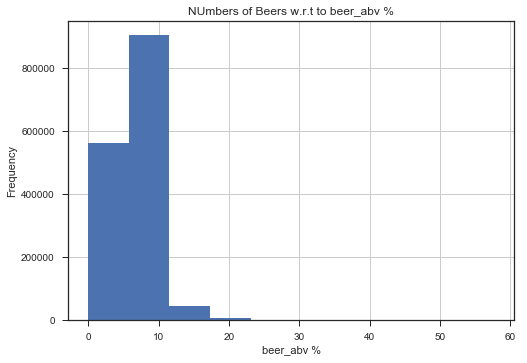

In [34]:
beerdf1[["beer_abv"]].hist()
plt.xlabel('beer_abv %')
plt.ylabel('Frequency')
plt.title('NUmbers of Beers w.r.t to beer_abv %')
plt.show()

In [35]:
print(str(Strong_ABV.iloc[0,0]) + ' produces the strongest beer with ' +str(Strong_ABV.iloc[0,2])  +'% ABV.')

Schorschbräu produces the strongest beer with 57.7% ABV.


### Step 6: Perform Exploratory Data Analysis

In [36]:
beerdf1.describe().round(2) # To take a look at Statistical Summary

,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.586614e+06,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1518829.00
mean,1.224089e+09,3.82,3.74,3.84,3.74,3.79,7.04
std,7.654427e+07,0.72,0.70,0.62,0.68,0.73,2.32
min,8.406720e+08,0.00,1.00,0.00,1.00,1.00,0.01
25%,1.173224e+09,3.50,3.50,3.50,3.50,3.50,5.20
50%,1.239203e+09,4.00,4.00,4.00,4.00,4.00,6.50
75%,1.288568e+09,4.50,4.00,4.00,4.00,4.50,8.50
max,1.326285e+09,5.00,5.00,5.00,5.00,5.00,57.70


Based on summary statistics, all reviews lie between 1 and 5. 

In [37]:
beerdf1['beer_name'].value_counts().head() 

90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
Name: beer_name, dtype: int64

In [38]:
beerdf1['beer_name'].value_counts().tail()

Pyraser Kellerbier                        1
Br&#257;lis Gaiais (Br&#257;lis Pale)    1
Besty                                     1
Stuft Pizza Honey Blonde                  1
Augustus Amber Ale                        1
Name: beer_name, dtype: int64

## No of review per beer varies from 1 to 3290

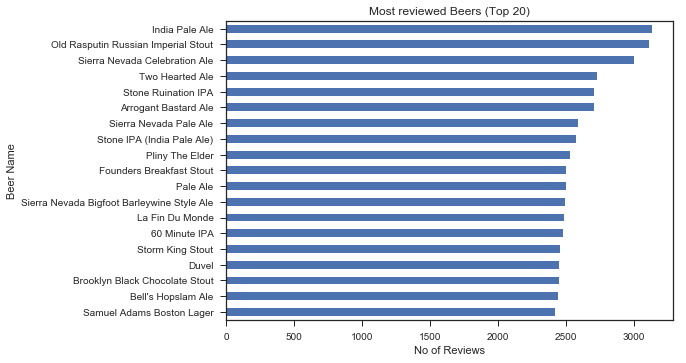

In [39]:
beerdf1['beer_name'].value_counts(ascending = False)[1:20].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('No of Reviews')
plt.ylabel('Beer Name')
plt.title('Most reviewed Beers (Top 20)')
plt.show()

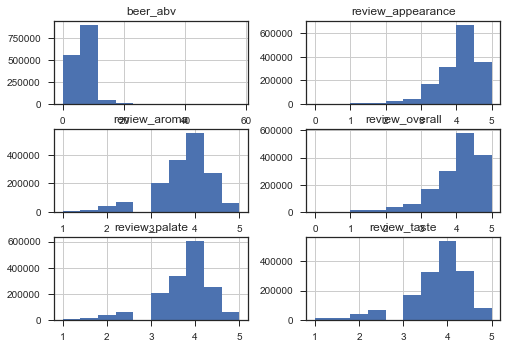

In [40]:
hist = beerdf1[["beer_abv", "review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"]].hist()

In [41]:
beerdf2 = beerdf1[["review_aroma", "review_appearance", "review_palate", "review_taste", "review_overall"]]

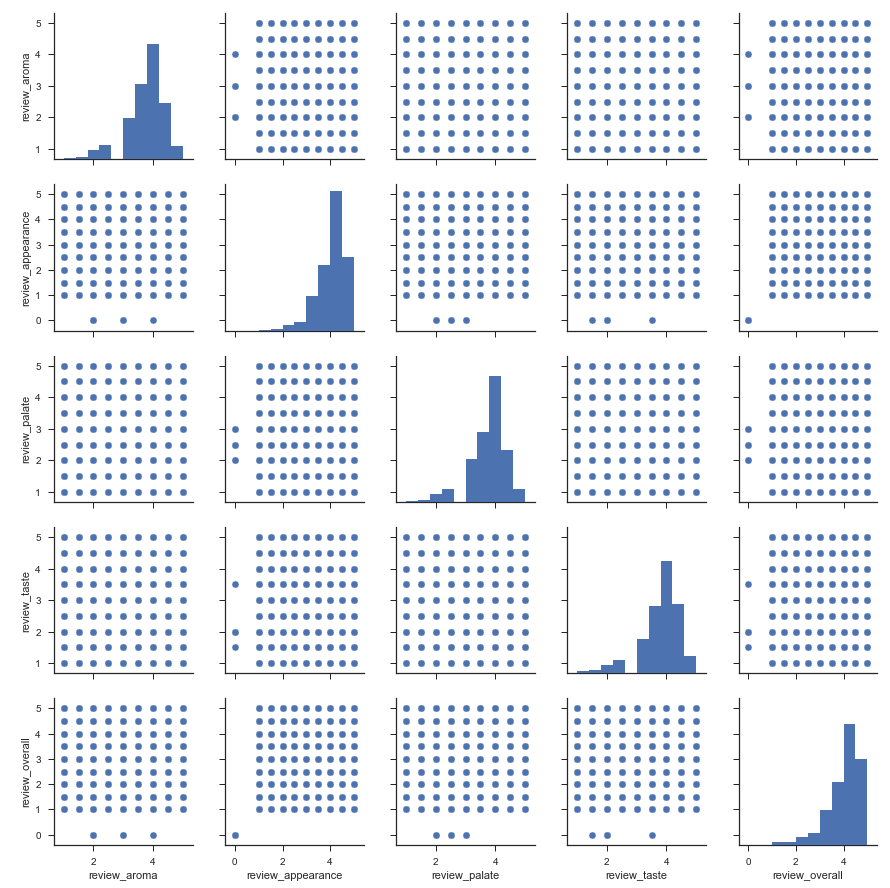

In [42]:
pairplot = sns.pairplot(beerdf2)

### Q3:  If you had to pick 3 beers to recommend using only this data, which would you pick?

##### Let's start by  looking at the  list of beers mean overall raiting of each bear (in the descending order). 

In [43]:
beerdf1.groupby('beer_name')['review_overall'].mean().sort_values(ascending=False).head(3) # Top five rows only. 

beer_name
Belgian Country Pale Ale    5.0
Edsten Triple-Wit           5.0
Empire Berliner Weisse      5.0
Name: review_overall, dtype: float64

##### Problem with the above stats is that even beer with one review (5 star rating) can make to this list. Therefore, it can be misleading. Let's now plot the total number of reviews  for each beer.

In [44]:
beerdf1['beer_name'].value_counts().head()

90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
Name: beer_name, dtype: int64

##### There is a good probability that good beers normally receive more number of reviews as well as higher ratings. Now we know that both the average review per beer and the number of ratings per beer are important attributes. Let's create a new dataframe that contains both of these attributes.

In [45]:
mean_overall_review_df = pd.DataFrame(beerdf1.groupby('beer_name')['review_overall'].mean())

In [46]:
mean_overall_review_df['review_counts'] = pd.DataFrame(beerdf1.groupby('beer_name')['review_overall'].count())

In [47]:
mean_overall_review_df.rename(columns = {'review_overall':'mean_review_overall'}, inplace = True)

In [48]:
mean_overall_review_df.head()

,mean_review_overall,review_counts
beer_name,,
! (Old Ale),4.0,1
"""100""",4.0,5
"""100"" Pale Ale",4.0,1
"""12"" Belgian Golden Strong Ale",4.0,2
"""33"" Export",3.0,3


##### Now , above table displays the beer name along with the average rating and number of ratings for each beer. Now Let's plot a histogram for the number of ratings represented by the "rreview_counts" column in the above dataframe.

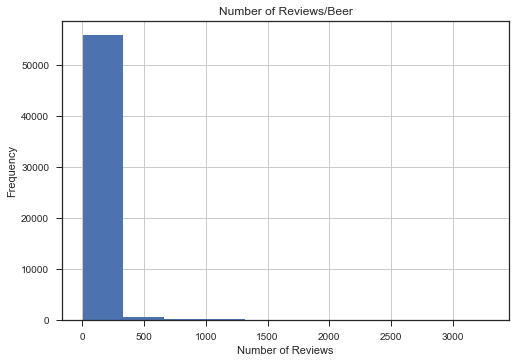

In [49]:
mean_overall_review_df['review_counts'].hist(bins=10)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Number of Reviews/Beer')
plt.show()

##### From the histogram shown above, you can see that majority of the beers have received less than 300 (approx.) reviews. While the number of beers having more than 650 reviews is very low. Now, let's plot a histogram for average ratings.

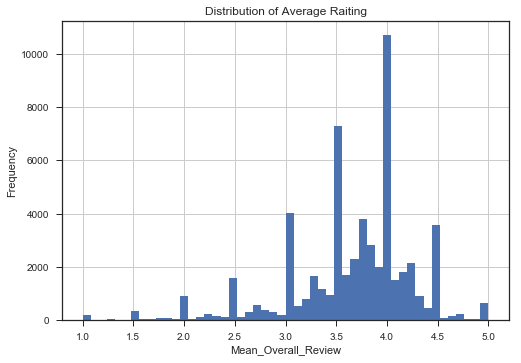

In [50]:
mean_overall_review_df['mean_review_overall'].hist(bins=50)
plt.xlabel('Mean_Overall_Review')
plt.ylabel('Frequency')
plt.title('Distribution of Average Raiting')
plt.show()

##### In the plot shown above, the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data. Now, lets plot Mean_Overall_Review against the number of reviews

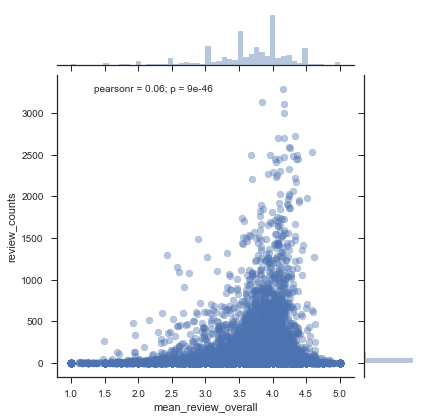

In [51]:
sns.jointplot(x='mean_review_overall', y='review_counts', data=mean_overall_review_df, alpha=0.4)

##### The plot shows that, beer with higher overall reviews  have more number of reviews, compared with beers that have lower mean overall_review. Now lets build a  recommendation system using matrix factorization. For that purpose,  pick a beer that is highly reviewd and mean rated value above 4.5

In [52]:
mean_overall_review_df

,mean_review_overall,review_counts
beer_name,,
! (Old Ale),4.000000,1
"""100""",4.000000,5
"""100"" Pale Ale",4.000000,1
"""12"" Belgian Golden Strong Ale",4.000000,2
"""33"" Export",3.000000,3
"""4"" Horse Oatmeal Stout",4.000000,2
"""400"" Ale",3.333333,18
"""50"" Golden Anniversary Lager",4.000000,1
"""76"" Anniversary Ale",4.000000,3


In [53]:
mean_overall_review_df[(mean_overall_review_df['review_counts']>300) & (mean_overall_review_df['mean_review_overall'] >=4.5)].sort_values('review_counts', ascending=False).head()

,mean_review_overall,review_counts
beer_name,,
Pliny The Elder,4.590028,2527
Weihenstephaner Hefeweissbier,4.515901,1981
Trappist Westvleteren 12,4.617925,1272
Trappist Westvleteren 8,4.514144,707
Founders CBS Imperial Stout,4.591052,637


### Lets Pick Beer 'Pliny The Elder' ( Highly reviewed: 2527 reviews and mean overall rating of approx 4.6)

In [54]:
## Take sum of all reviews and subset beerdf1 to select only revelant columns

In [55]:
beerdf1['sum_reviews'] = beerdf1.review_overall + beerdf1.review_aroma + beerdf1.review_appearance + beerdf1.review_palate + beerdf1.review_taste

In [56]:
beerdf2 = beerdf2 = beerdf1[["review_profilename", "beer_name", "sum_reviews"]]

In [57]:
beerdf2.head()

,review_profilename,beer_name,sum_reviews
0,stcules,Sausa Weizen,9.0
1,stcules,Red Moon,14.5
2,stcules,Black Horse Black Beer,14.5
3,stcules,Sausa Pils,15.0
4,johnmichaelsen,Cauldron DIPA,21.0


#### To create the matrix of beers and corresponding aggregated reviews, execute the following script:

In [58]:
beerdf2_pivot = beerdf2.pivot_table(index=['review_profilename'], columns=['beer_name'], values='sum_reviews')

In [59]:
beerdf2_pivot.head()

beer_name,! (Old Ale),"""100""","""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""4"" Horse Oatmeal Stout","""400"" Ale","""50"" Golden Anniversary Lager","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops",...,Łask Žywe Niefiltrowane,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,Ω-naught (Omeganaught),“Chewy” Double IPA,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02maxima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
Pliny_Elder_reviews = beerdf2_pivot['Pliny The Elder']

In [61]:
Pliny_Elder_reviews.head()

review_profilename
0110x011       24.0
01Ryan10        NaN
02maxima        NaN
03SVTCobra      NaN
04101Brewer     NaN
Name: Pliny The Elder, dtype: float64

In [62]:
## Now let's retrieve all the beers that are similar to "Pliny The Elder"

In [63]:
beer_like_Pliny_Elder = beerdf2_pivot.corrwith(Pliny_Elder_reviews)

corr_Pliny_Elder = pd.DataFrame(beer_like_Pliny_Elder, columns=['Correlation'])  
corr_Pliny_Elder.dropna(inplace=True)  
corr_Pliny_Elder.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlation
beer_name,
"""100""",0.342997
"""400"" Ale",0.087586
"""76"" Anniversary Ale",-0.866025
"""Alt""ered State",1.000000
"""Hop Obama"" Ale",0.269236


In [64]:
## Let's sort the beers in descending order of correlation to see highly correlated beers at the top.

In [65]:
corr_Pliny_Elder.sort_values('Correlation', ascending=False).head(10)

,Correlation
beer_name,
Three Rings Belgian-style Pale Ale,1.0
Monadnock Mountain Ale,1.0
Duckstein Rotblondes Weizen,1.0
Syrah Barrel La Trappistine With Brettanomyces,1.0
Sèv,1.0
Irseer Kloster-Urtrunk,1.0
Armadillo Amber,1.0
Pale Moon,1.0
Saison Gourmet,1.0


In [66]:
## Retrieve only those correlated beers that have at least more than 300 reviews. To do so, will add the review_counts column from the rating_mean_count dataframe to our mean_overall_review_df dataframe. 

In [67]:
corr_Pliny_Elder = corr_Pliny_Elder.join(mean_overall_review_df['review_counts'])  
corr_Pliny_Elder.head() 

,Correlation,review_counts
beer_name,,
"""100""",0.342997,5
"""400"" Ale",0.087586,18
"""76"" Anniversary Ale",-0.866025,3
"""Alt""ered State",1.000000,2
"""Hop Obama"" Ale",0.269236,28


In [68]:
corr_Pliny_Elder[corr_Pliny_Elder ['review_counts']>300].sort_values('Correlation', ascending=False).head(3)

,Correlation,review_counts
beer_name,,
Pliny The Elder,1.000000,2527
Pliny The Younger,0.432710,610
Blind Pig IPA,0.376914,1141


 ### Answer 2: Recommended Beers: Pliny The Elder, Pliny The Younger &  Blind Pig IPA

In [69]:
mean_overall_review_df.loc['Pliny The Elder'] 

mean_review_overall       4.590028
review_counts          2527.000000
Name: Pliny The Elder, dtype: float64

In [70]:
mean_overall_review_df.loc['Pliny The Younger']

mean_review_overall      4.6
review_counts          610.0
Name: Pliny The Younger, dtype: float64

In [71]:
mean_overall_review_df.loc['Blind Pig IPA']

mean_review_overall       4.36021
review_counts          1141.00000
Name: Blind Pig IPA, dtype: float64

### Q3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In [72]:
beerdf3 = beerdf1[["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]]

In [73]:
beerdf3.corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616013,0.501732,0.701914,0.789816
review_aroma,0.616013,1.000000,0.561029,0.616947,0.716776
review_appearance,0.501732,0.561029,1.000000,0.566634,0.546980
review_palate,0.701914,0.616947,0.566634,1.000000,0.734135
review_taste,0.789816,0.716776,0.546980,0.734135,1.000000


##### Taste is the most important factor  as it is highly correlated with overall review of the beer. ( we are assuming that Quality is directly proportion to Overall_review)

### Q4: Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [74]:
# Lets create subset of dataframe

In [75]:
beer_styledf = beerdf1[['review_aroma', 'review_appearance', 'beer_style']]

In [76]:
beer_styledf.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [77]:
##Take Average of Aroma Review and Appearance review

In [78]:
beer_styledf['average_aroma_appearance'] = (beer_styledf.review_aroma + beer_styledf.review_appearance)/2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
beer_styledf = beer_styledf[['beer_style', 'review_aroma', 'review_appearance', 'average_aroma_appearance']]

In [80]:
beer_styledf.head()

,beer_style,review_aroma,review_appearance,average_aroma_appearance
0,Hefeweizen,2.0,2.5,2.25
1,English Strong Ale,2.5,3.0,2.75
2,Foreign / Export Stout,2.5,3.0,2.75
3,German Pilsener,3.0,3.5,3.25
4,American Double / Imperial IPA,4.5,4.0,4.25


In [81]:
#### Take mean vakues of rating for each bear and sort from high to low.

In [82]:
beer_styledf_agg = beer_styledf.groupby('beer_style')[['review_aroma', 'review_appearance', 'average_aroma_appearance' ]].mean().sort_values(by='average_aroma_appearance', ascending=False)[:10]

In [83]:
beer_styledf_agg

,review_aroma,review_appearance,average_aroma_appearance
beer_style,,,
American Double / Imperial Stout,4.160665,4.163633,4.162149
Russian Imperial Stout,4.076576,4.210072,4.143324
Quadrupel (Quad),4.132533,4.117964,4.125249
American Double / Imperial IPA,4.097782,4.078916,4.088349
Gueuze,4.117574,4.034864,4.076219
American Wild Ale,4.126756,4.005451,4.066104
Eisbock,4.156778,3.964514,4.060646
American Barleywine,4.019343,4.036535,4.027939
Belgian IPA,3.979753,4.075214,4.027484


##### Table shown above clearly indicates American Double / Imperial Stout with highest overall rating. However, scatterplot and pair plot can be  analyzed prior to making solution. 

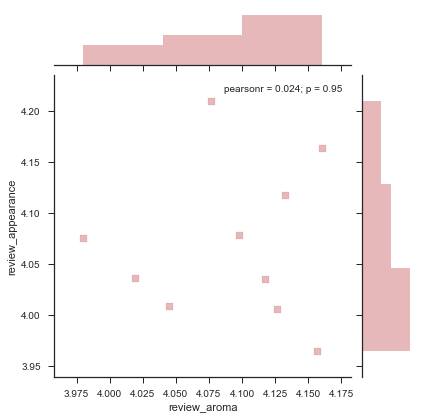

In [84]:
g = sns.jointplot(x='review_aroma', y='review_appearance', data=beer_styledf_agg, color="r", alpha=0.4, marker = 's')

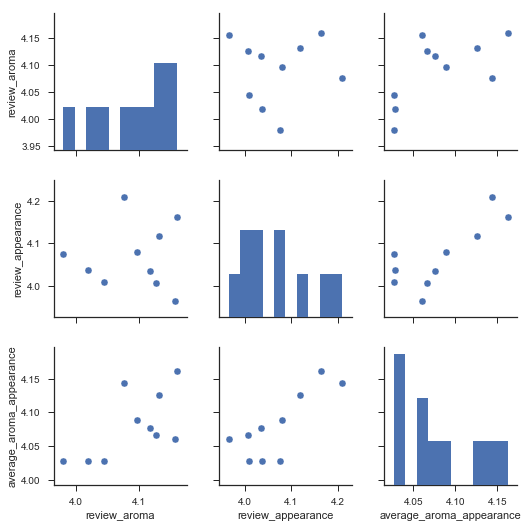

In [85]:
sns.pairplot(beer_styledf_agg)

In [86]:
beer_styledf_agg.corr()

,review_aroma,review_appearance,average_aroma_appearance
review_aroma,1.000000,0.024317,0.633060
review_appearance,0.024317,1.000000,0.789268
average_aroma_appearance,0.633060,0.789268,1.000000


### Answer 4: Reccomended beer_style based on aroma and appearance is:  American Double / Imperial Stout	